# Delhi House Price Prediction 

## Introduction
Following project is a House price prediction project. Data is based on house prices in Delhi and nearby areas. Data contains various features affecting the price of a house such as Area, BHK, Number of Bathrooms, Number of Parkings etc. Various Machine learning Regression Algorithms have been used while predicting. The project also focuses a common problem of Overfitting and Underfitting while working with ML models. To address that each model's evaluation has been done on both Training and Testing sets and their results have been compared to assess the level of biasness and variance in the testing set compared to the training one.

In [1]:
## Necessary libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_context('talk')
sns.set_style('white')

## Data & Pre-Processing

In [2]:
df= pd.read_csv('MagicBricks.csv')
print('Shape- ', df.shape)
print('\n')
print('Dataypes- ','\n',df.dtypes.value_counts())
df.head()

Shape-  (1259, 11)


Dataypes-  
 object     5
float64    4
int64      2
dtype: int64


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [3]:
df.drop('Locality',axis=1,inplace=True)
df.sample(5)

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
745,1300.0,3,3.0,Furnished,1.0,20000000,Ready_to_move,New_Property,Apartment,15384.0
942,750.0,2,1.0,Semi-Furnished,2.0,6500000,Ready_to_move,New_Property,Apartment,8640.0
82,1560.0,3,2.0,Furnished,2.0,15800000,Ready_to_move,Resale,Apartment,3524.0
488,1387.0,4,4.0,Unfurnished,1.0,5890000,Ready_to_move,New_Property,Apartment,4247.0
523,400.0,2,1.0,Furnished,1.0,2500000,Ready_to_move,New_Property,Apartment,6667.0


### Removing Duplicates

In [4]:
df.duplicated().sum()

83

In [5]:
df.drop_duplicates(keep='first',inplace=True)
df.shape

(1176, 10)

### Handling Null Values

In [6]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         1
Furnishing       5
Parking         31
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       227
dtype: int64

In [7]:
df['Per_Sqft'].describe()

count       949.000000
mean      15817.306639
std       21761.574205
min        1259.000000
25%        6471.000000
50%       11111.000000
75%       18000.000000
max      183333.000000
Name: Per_Sqft, dtype: float64

In [8]:
df['Per_Sqft'].fillna(np.mean(df['Per_Sqft']),inplace=True)

In [9]:
df['Type'].value_counts(normalize=True)

Builder_Floor    0.549103
Apartment        0.450897
Name: Type, dtype: float64

In [10]:
df.dropna(inplace=True)
df.shape

(1144, 10)

## Feature Engineering

In [11]:
uniq_vals= df.nunique().sort_values(ascending=False)
uniq_vals

Area           312
Price          279
Per_Sqft       247
Parking          9
BHK              8
Bathroom         7
Furnishing       3
Status           2
Transaction      2
Type             2
dtype: int64

### Dividing columns into Binary, Categorical, Ordinal and Numerical Types

### Binary columns

In [12]:
binary_cols= uniq_vals[uniq_vals==2].index
binary_cols

Index(['Status', 'Transaction', 'Type'], dtype='object')

In [13]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
lb= LabelBinarizer()
le= LabelEncoder()

In [14]:
for col in binary_cols:
    df[col]= lb.fit_transform(df[col])

### Categorical Columns

In [15]:
cat_cols= uniq_vals[(uniq_vals >2)&(uniq_vals <10)].index
cat_cols

Index(['Parking', 'BHK', 'Bathroom', 'Furnishing'], dtype='object')

In [16]:
[[i, list(df[i].unique())] for i in cat_cols]

[['Parking', [1.0, 5.0, 2.0, 4.0, 9.0, 3.0, 39.0, 10.0, 114.0]],
 ['BHK', [3, 2, 4, 1, 6, 5, 7, 10]],
 ['Bathroom', [2.0, 3.0, 4.0, 1.0, 5.0, 6.0, 7.0]],
 ['Furnishing', ['Semi-Furnished', 'Furnished', 'Unfurnished']]]

### Ordinal Columns

In [17]:
ordinary_cols= ['Parking', 'BHK', 'Bathroom']

In [18]:
for col in ordinary_cols:
    df[col]= le.fit_transform(df[col])

### Numerical Columns

In [19]:
num_cols= list(set(df.columns)- set(binary_cols)- set(cat_cols))
num_cols

['Per_Sqft', 'Price', 'Area']

### Final Encoding

In [20]:
df_pro= pd.get_dummies(data= df, columns=['Furnishing'], drop_first=True)
df_pro.head()

,Area,BHK,Bathroom,Parking,Price,Status,Transaction,Type,Per_Sqft,Furnishing_Semi-Furnished,Furnishing_Unfurnished
0,800.0,2,1,0,6500000,1,0,1,15817.306639,1,0
1,750.0,1,1,0,5000000,1,0,0,6667.000000,1,0
2,950.0,1,1,0,15500000,1,1,0,6667.000000,0,0
3,600.0,1,1,0,4200000,1,1,1,6667.000000,1,0
4,650.0,1,1,0,6200000,1,0,1,6667.000000,1,0


## Statistical insights-

In [21]:
round(df_pro.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Area,1144.0,1453.98,1502.68,28.0,800.0,1179.5,1700.00,24300.0
BHK,1144.0,1.79,0.94,0.0,1.0,2.0,2.00,7.0
Bathroom,1144.0,1.56,1.05,0.0,1.0,1.0,2.00,6.0
Parking,1144.0,0.51,0.97,0.0,0.0,0.0,1.00,8.0
Price,1144.0,21191241.26,25424398.21,1000000.0,5775000.0,14000000.0,26000000.00,240000000.0
Status,1144.0,0.95,0.22,0.0,1.0,1.0,1.00,1.0
Transaction,1144.0,0.63,0.48,0.0,0.0,1.0,1.00,1.0
Type,1144.0,0.55,0.50,0.0,0.0,1.0,1.00,1.0
Per_Sqft,1144.0,15795.47,19723.48,1259.0,6714.0,14627.5,15817.31,183333.0
Furnishing_Semi-Furnished,1144.0,0.57,0.50,0.0,0.0,1.0,1.00,1.0


## Skewness and Outliers in the data

### Boxplots 

<AxesSubplot:xlabel='BHK'>

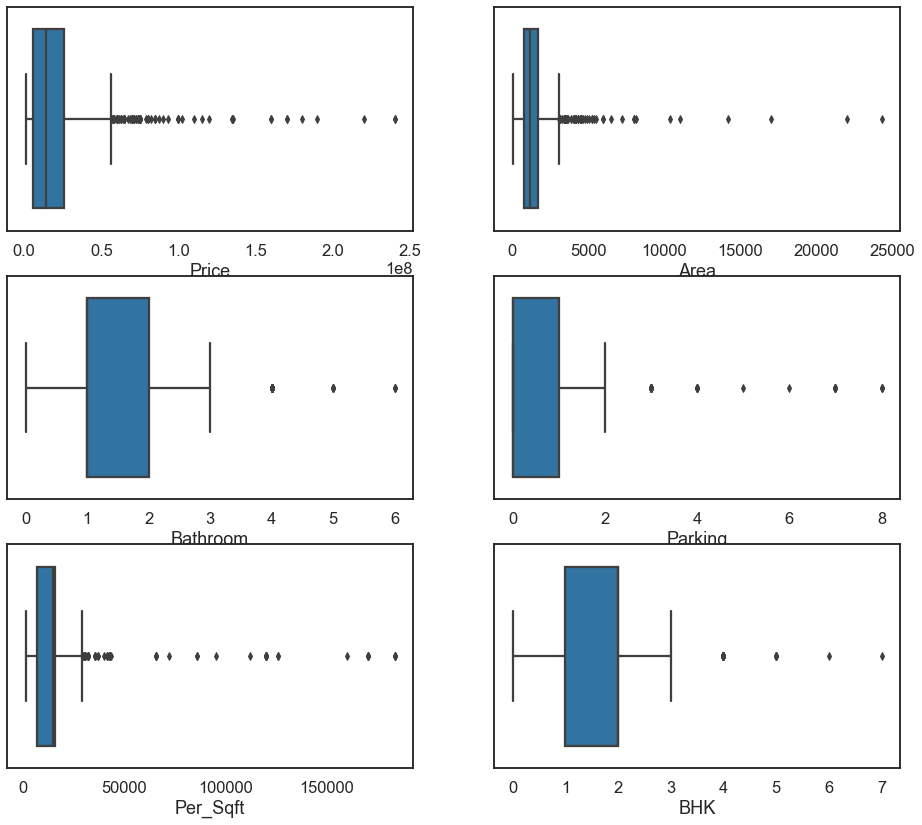

In [22]:
plt.figure(figsize=(16,14))
plt.subplot(3,2,1)
sns.boxplot(df_pro['Price'])

plt.subplot(3,2,2)
sns.boxplot(df_pro['Area'])

plt.subplot(3,2,3)
sns.boxplot(df_pro['Bathroom'])

plt.subplot(3,2,4)
sns.boxplot(df_pro['Parking'])

plt.subplot(3,2,5)
sns.boxplot(df_pro['Per_Sqft'])

plt.subplot(3,2,6)
sns.boxplot(df_pro['BHK'])

### Histograms

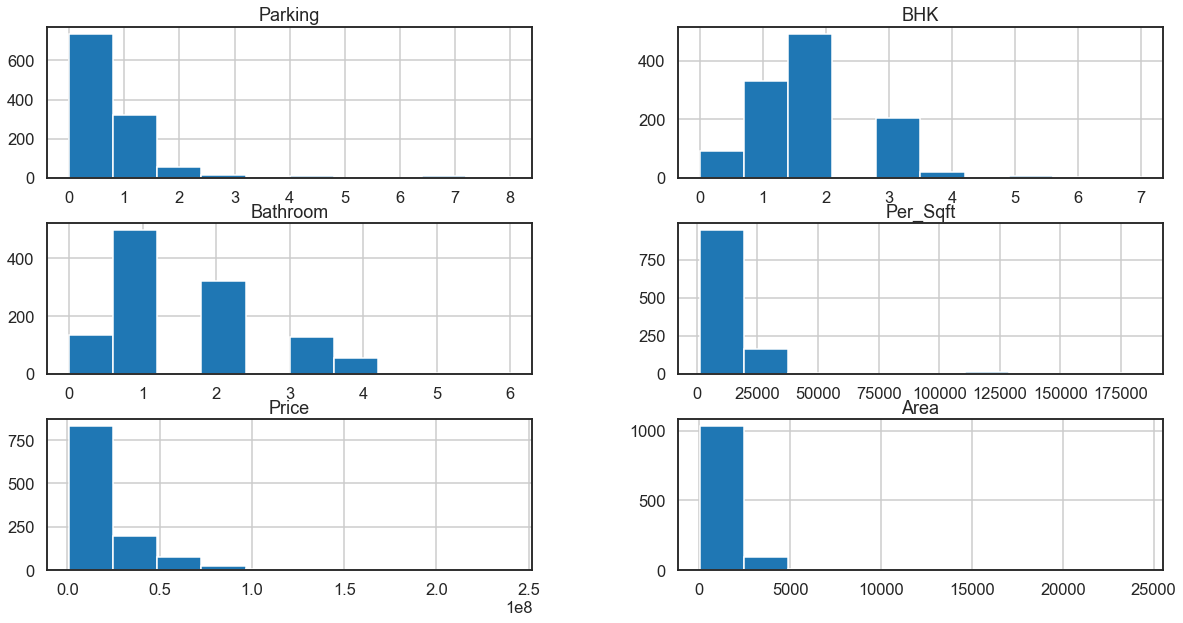

In [23]:
for col in [ordinary_cols+num_cols]:
   df_pro[col].hist(figsize=(20,10))

### Detecting outliers and skewed variables

In [24]:
def get_outliers(column):
    q1,q3= np.percentile(df_pro[column],[25,75])
    iqr= q3-q1
    up_bnd= q3+(1.5*iqr)
    lw_bnd= q1-(1.5*iqr)
    
    outl= df_pro[(df_pro[column] >up_bnd)|(df_pro[column]<lw_bnd)] 
    return outl

In [25]:
skew_cols= df_pro[num_cols+ordinary_cols].skew().sort_values(ascending=False)
skew_cols= skew_cols[skew_cols >0.7]
skew_cols

Area        7.838380
Per_Sqft    5.808826
Parking     3.910840
Price       3.556143
Bathroom    0.813183
dtype: float64

The above points look highly skewed

In [26]:
total_outl= pd.concat([get_outliers('Parking'),get_outliers('Per_Sqft'),get_outliers('Price'),
                       get_outliers('Area'),get_outliers('Bathroom'),get_outliers('BHK')],axis=0)

In [27]:
print('Shape- ',total_outl.shape)
print('Duplicates- ',total_outl.duplicated().sum())

Shape-  (344, 11)
Duplicates-  136


In [28]:
total_outl= total_outl.drop_duplicates(keep='first')
total_outl.shape

(208, 11)

In [29]:
df_pro= df_pro.drop(total_outl.index,axis=0)
df_pro.shape

(936, 11)

Outliers have been removed and it will lead to removal of skewness upto a limit.

### Histograms after normalising data

In [30]:
df_pro['Parking']= np.log1p(df_pro['Parking'])

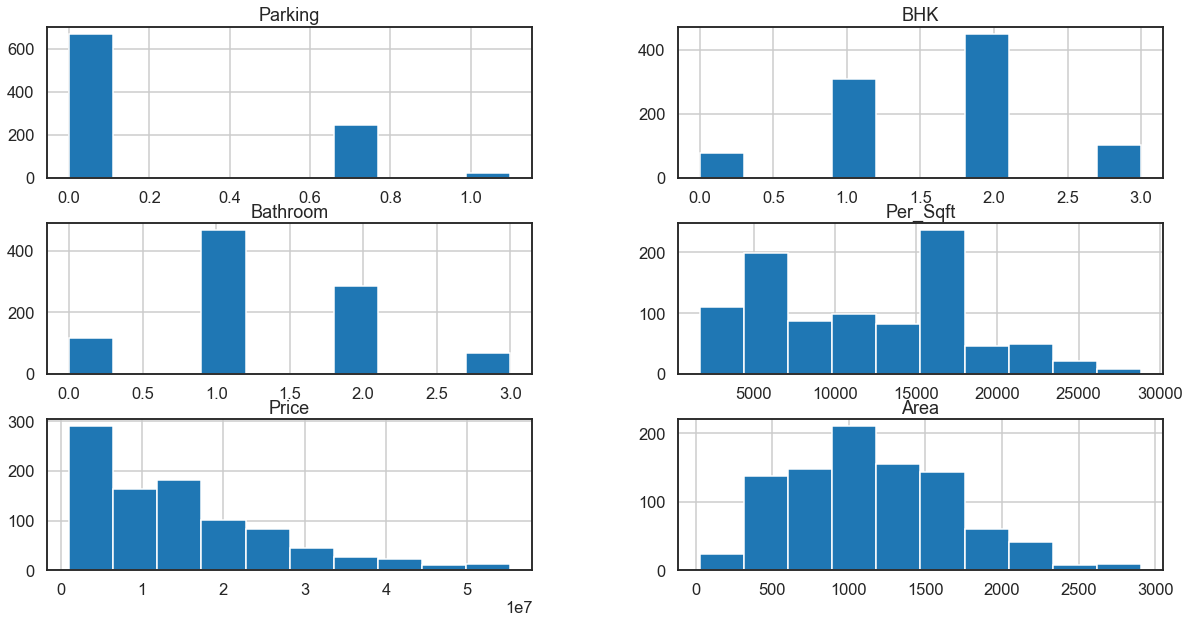

In [31]:
for col in [ordinary_cols+num_cols]:
   df_pro[col].hist(figsize=(20,10))

We have removed skewness from all majorly skewed variables but it has not been removed from our target variable i.e. Price. We will do this after spliting data into training and testing sets.

## Pearson Correlation-

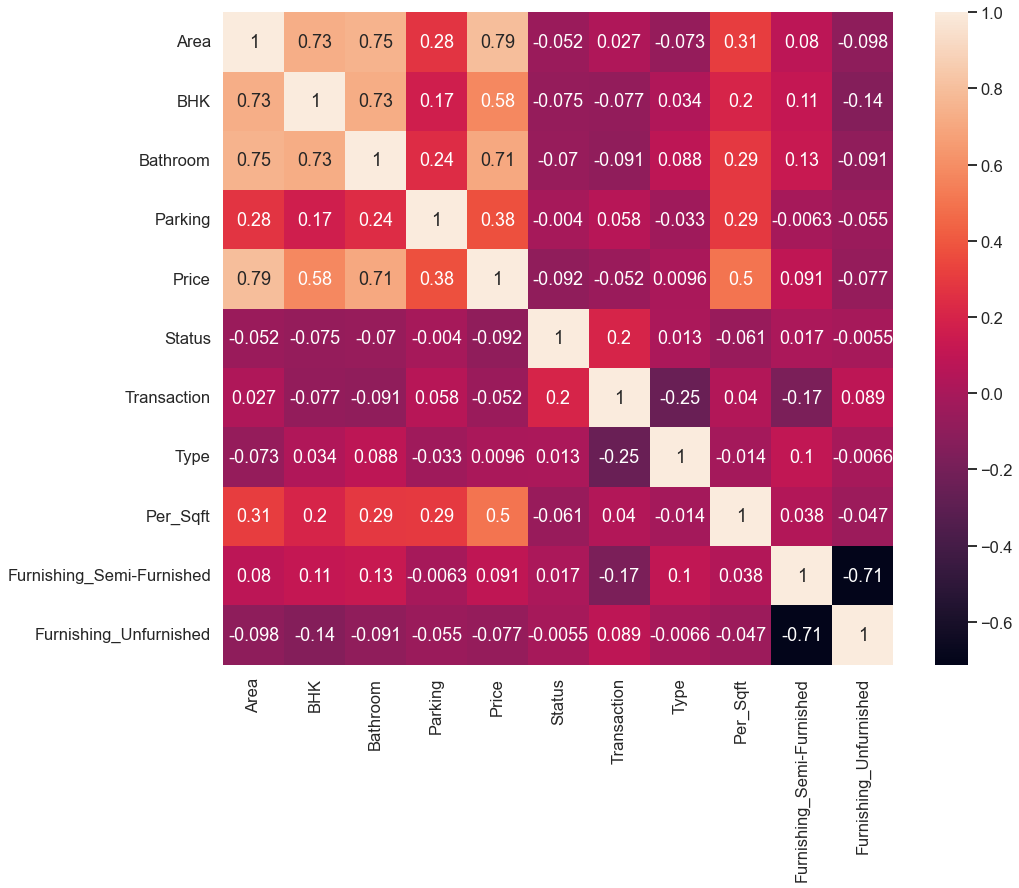

In [32]:
plt.figure(figsize=(15,12))
sns.heatmap(df_pro.corr(), annot=True);

## How strong correlation is between Price and feature columns?

In [33]:
feat_cols= [x for x in df_pro.columns if x not in 'Price']
target_col= 'Price'

Correlation-  
 Area                         0.793164
Bathroom                     0.705298
BHK                          0.576480
Per_Sqft                     0.501851
Parking                      0.376539
Furnishing_Semi-Furnished    0.090883
Type                         0.009552
Transaction                 -0.051825
Furnishing_Unfurnished      -0.076719
Status                      -0.091551
dtype: float64


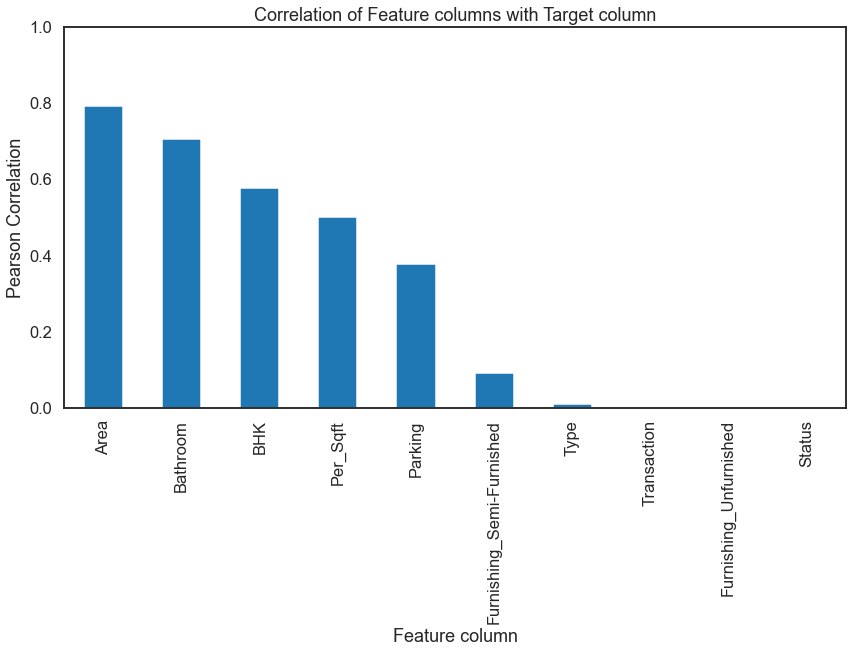

In [34]:
corr_df= df_pro[feat_cols].corrwith(df_pro[target_col]).sort_values(ascending=False)
print('Correlation- ','\n', corr_df)
ax= corr_df.plot(kind='bar',figsize=(14,7))
ax.set(xlabel= 'Feature column',
      ylabel= 'Pearson Correlation',
      title='Correlation of Feature columns with Target column',
      ylim=[0,1]);

## Data split between Training and Hold out set

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
a= df_pro[feat_cols]
b=df_pro[target_col]

## Model Development

In [37]:
from sklearn.linear_model import LinearRegression, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [38]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [39]:
from sklearn.metrics import r2_score, mean_squared_error

In [40]:
def rmse(x_true,x_pred):
    return np.sqrt(mean_squared_error(x_true, x_pred))

In [41]:
def get_evaluation(x,y,estimator):
    x_train, x_test, y_train, y_test= train_test_split(x, y,test_size=0.3, random_state= 42)
    bxc= boxcox(y_train)
    y_train_tf= bxc[0]
    y_lmb= bxc[1]
    
    estimator.fit(x_train, y_train_tf)
    
    y_train_pr= estimator.predict(x_train)
    y_train_pr_tf= inv_boxcox(y_train_pr, y_lmb)
    
    y_test_pr= estimator.predict(x_test)
    y_test_pr_tf= inv_boxcox(y_test_pr, y_lmb)
    
    scores= pd.DataFrame({'r2_score':[r2_score(y_train, y_train_pr_tf),r2_score(y_test, y_test_pr_tf)],
                         'rmse':[round(rmse(y_train, y_train_pr_tf),2),round(rmse(y_test, y_test_pr_tf),2)]},
                         index=['train','test'])
    return scores     

In [42]:
def get_chart(column1,column2,mod):
    plt.figure(figsize=(18,5))
    plt.subplot(1,2,1)
    ax1= mod[column1].plot(kind='bar')
    ax1.set(ylabel='R2 Score',xlabel='Set name',title='R2 Score difference',ylim=[0,1])
    plt.xticks(rotation=45)
    
    plt.subplot(1,2,2)
    ax2= mod[column2].plot(kind='bar',color='green')
    ax2.set(xlabel='Set name', ylabel='Root Mean Squared Error', title='RMSE Difference')
    plt.xticks(rotation=45)
    return plt.show()

In [43]:
p='r2_score'
q='rmse'

### 1. Linear Regression

In [44]:
lr= LinearRegression()

md1= get_evaluation(a,b,lr)
md1

,r2_score,rmse
train,0.720157,6172995.10
test,0.705119,6081207.77


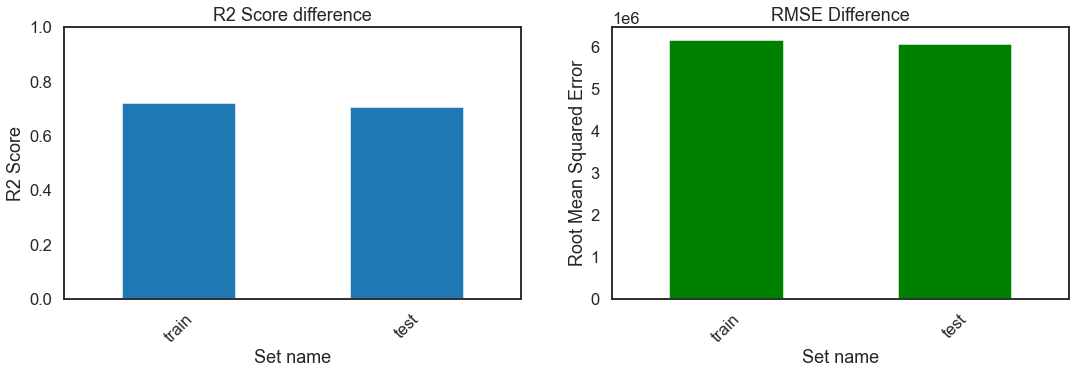

In [45]:
get_chart(p,q,md1)

## 2. Lasso Regression

In [46]:
las= LassoCV(alphas=[0.001,0.01,0.001,0.1,0.3,0.6,1,4,7,12], max_iter=1000,cv=6)

md2= get_evaluation(a,b,las)
md2

,r2_score,rmse
train,0.720931,6164453.65
test,0.711595,6014061.10


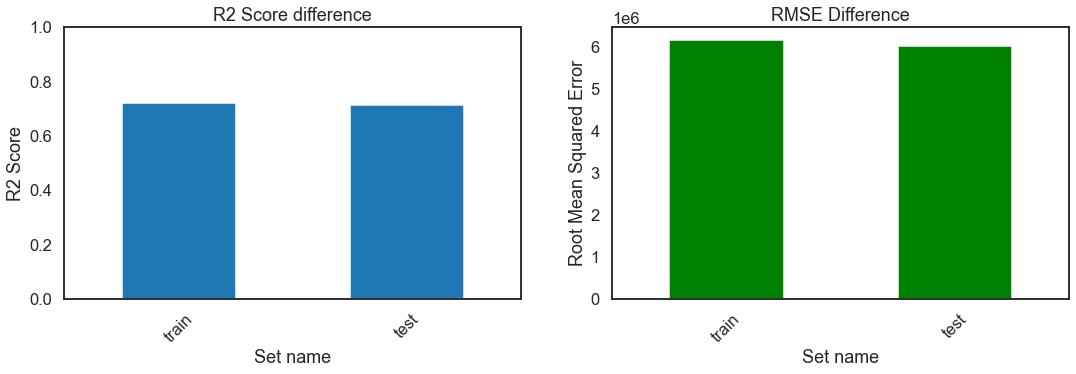

In [47]:
get_chart(p, q ,md2)

## 3. Elastic Net

In [48]:
el_net= ElasticNetCV(alphas=[0.001,0.01,0.1,0.4,0.7,1,3,5,10,13],
                    l1_ratio=np.linspace(0.1,1,10),
                    cv=6)

In [49]:
md3= get_evaluation(a, b,el_net)
md3

,r2_score,rmse
train,0.720931,6164453.65
test,0.711595,6014061.10


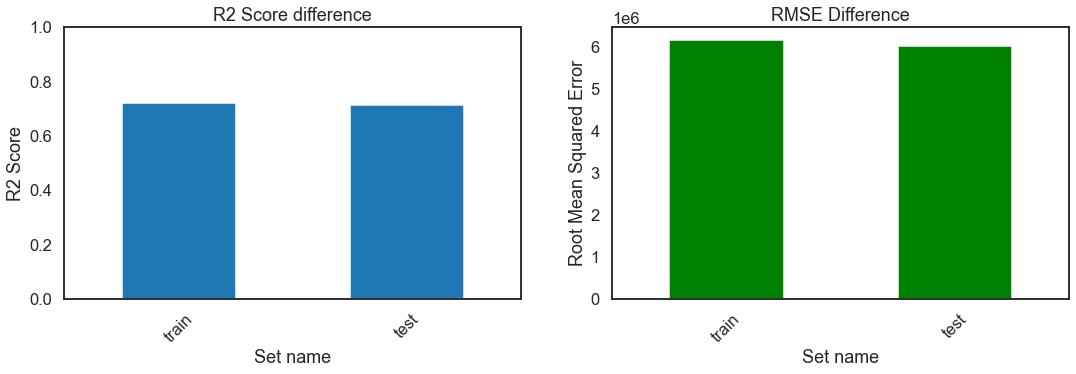

In [50]:
get_chart(p, q ,md3)

## 4. Decision tree

In [51]:
dt= DecisionTreeRegressor()

md4= get_evaluation(a,b,dt)
md4

,r2_score,rmse
train,0.999195,331077.38
test,0.550686,7506570.35


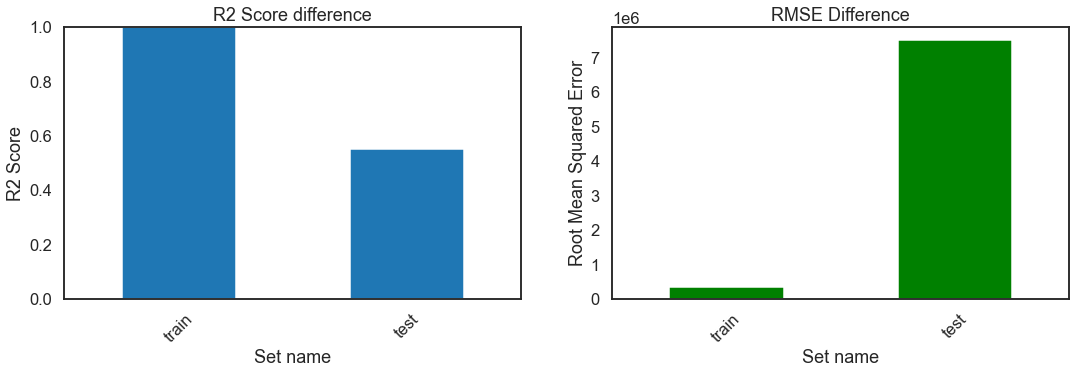

In [52]:
get_chart(p, q, md4)

## 5. Random Forest

In [53]:
rf= RandomForestRegressor()
md5= get_evaluation(a,b, rf)
md5

,r2_score,rmse
train,0.966671,2130333.22
test,0.777867,5278046.81


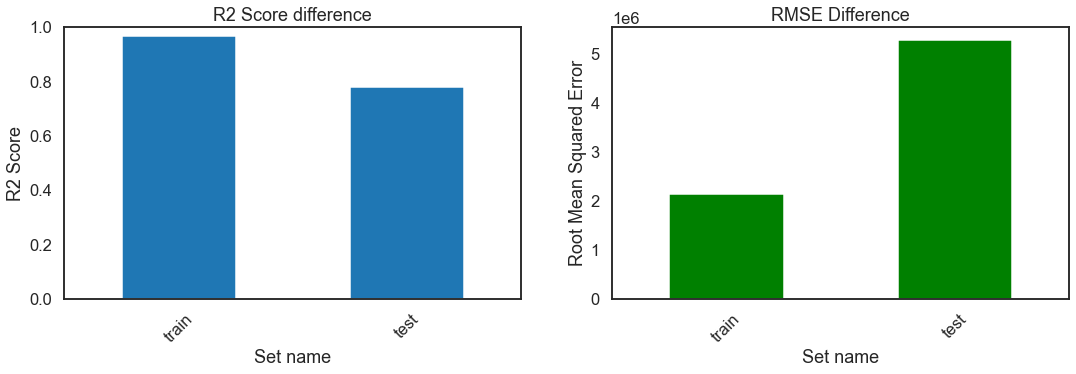

In [54]:
get_chart(p,q,md5)

## 6. Gradient Boosting 

In [55]:
gb= GradientBoostingRegressor()

md8= get_evaluation(a, b, gb)
md8

,r2_score,rmse
train,0.875989,4109313.47
test,0.775790,5302663.12


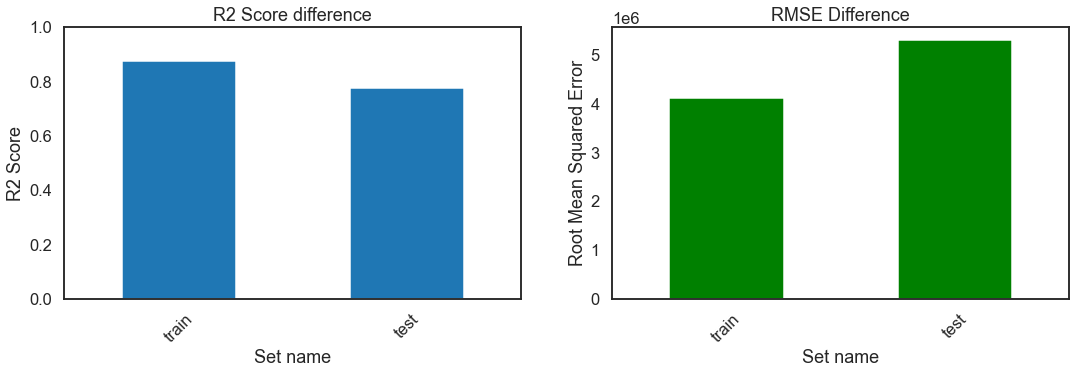

In [56]:
get_chart(p, q, md8)

Looking at above results we can see that Decision Tree and Random Forest are giving us best results. But both have a difference in their Training vs Testing outcome. This is due to Overfitting. Both models have a very low training error but a high error when it's being applied in testing set. In the next step we will try to minimize that biasness and will also try to optimize both the models using different hyperparameters and feature engineering steps.   

## Decision Tree Model optimization 

In [57]:
from sklearn.model_selection import GridSearchCV

In [132]:
params= {
        'max_features':range(1,len(dt.feature_importances_)+1),
        'max_depth':range(1,dt.tree_.max_depth+1,2),
        "splitter":["best","random"],
        "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
       }

estimator= DecisionTreeRegressor()

gs_dt2= GridSearchCV(param_grid=params,
                    estimator= estimator,
                    scoring='neg_mean_squared_error',
                    n_jobs=-1,
                    cv=6)

In [133]:
%%time
get_evaluation(a,b,gs_dt2)

CPU times: total: 4.8 s
Wall time: 40.5 s


,r2_score,rmse
train,0.872966,4159100.32
test,0.734068,5774999.40


In [134]:
gs_dt2.best_estimator_

DecisionTreeRegressor(max_depth=15, max_features=6, min_samples_leaf=4)

## Random Forest Model Optimization 

In [157]:
params= {
     'max_features':range(1,len(rf.feature_importances_)+1),
    'max_depth':range(1,20,2)
}

gs_rf2= GridSearchCV(param_grid=params,
                    estimator=RandomForestRegressor(n_estimators=500),
                    n_jobs=-1,
                    scoring='neg_mean_squared_error',
                    cv=6)

In [158]:
%%time
get_evaluation(a,b,gs_rf2)

CPU times: total: 3.62 s
Wall time: 7min


,r2_score,rmse
train,0.930249,3081877.24
test,0.788983,5144287.55


In [159]:
gs_rf2.best_estimator_

RandomForestRegressor(max_depth=9, max_features=4, n_estimators=500)

## Importance of each feature according to Random Forest 

In [160]:
feat_imp= pd.DataFrame(gs_rf2.best_estimator_.feature_importances_,
                       index=a.columns,
                      columns=['coefficient']).sort_values(by='coefficient',ascending=False)
feat_imp

,coefficient
Area,0.487673
Bathroom,0.178510
Per_Sqft,0.164000
BHK,0.097636
Parking,0.024594
Type,0.015494
Transaction,0.011407
Furnishing_Unfurnished,0.007672
Furnishing_Semi-Furnished,0.007621
Status,0.005393


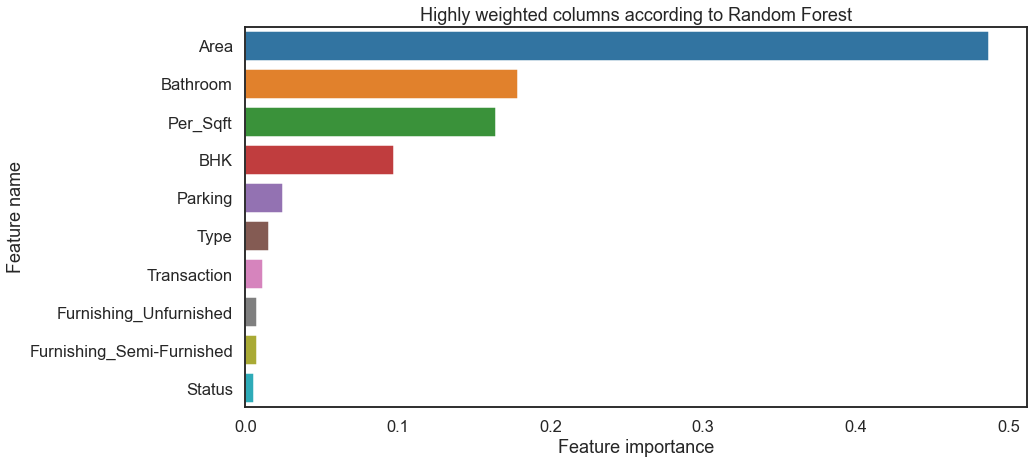

In [161]:
plt.figure(figsize=(14,7))
ax= sns.barplot(y=feat_imp.index, x= feat_imp['coefficient'])
ax.set(ylabel='Feature name',
      xlabel='Feature importance',
      title='Highly weighted columns according to Random Forest');

After hyper-parameters tuning biasness and varaiance have been reduced but not upto a satisfactory level.